<a href="https://colab.research.google.com/github/Snehaveerakumar-22/ML_Sample_project/blob/main/4bayesian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nodes: ['Burglary', 'Alarm', 'Earthquake', 'JohnCalls', 'MaryCalls']
Edges: [('Burglary', 'Alarm'), ('Alarm', 'JohnCalls'), ('Alarm', 'MaryCalls'), ('Earthquake', 'Alarm')]


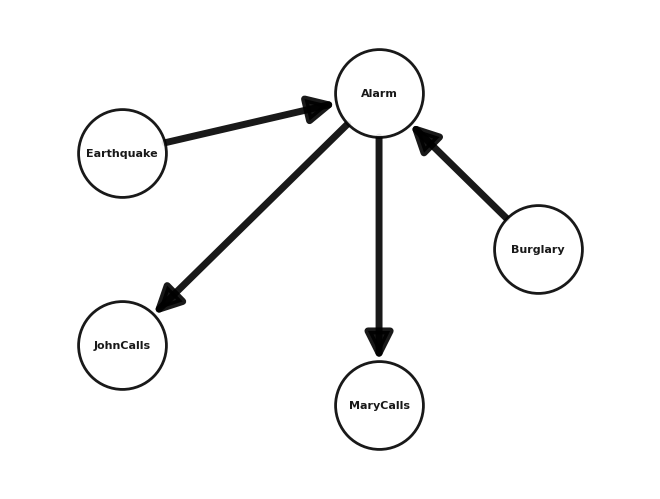

P(J|E):
+--------------+------------------+
| JohnCalls    |   phi(JohnCalls) |
+==============+==================+
| JohnCalls(0) |           0.7029 |
+--------------+------------------+
| JohnCalls(1) |           0.2971 |
+--------------+------------------+
P(E|J):
+---------------+-------------------+
| Earthquake    |   phi(Earthquake) |
+===============+===================+
| Earthquake(0) |            0.9886 |
+---------------+-------------------+
| Earthquake(1) |            0.0114 |
+---------------+-------------------+
P(E|J^c, M):
+---------------+-------------------+
| Earthquake    |   phi(Earthquake) |
+===============+===================+
| Earthquake(0) |            0.9944 |
+---------------+-------------------+
| Earthquake(1) |            0.0056 |
+---------------+-------------------+
P(B|A, M^c):
+-------------+-----------------+
| Burglary    |   phi(Burglary) |
+=============+=================+
| Burglary(0) |          0.6264 |
+-------------+-----------------+
| Bu

In [5]:
import matplotlib.pyplot as plt
import networkx as nx
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import CausalInference
from pgmpy.models import BayesianNetwork

# %load_ext lab_black
# Defining network structure
alarm_model = BayesianNetwork(
    [
        ("Burglary", "Alarm"),
        ("Earthquake", "Alarm"),
        ("Alarm", "JohnCalls"),
        ("Alarm", "MaryCalls"),
    ]
)

# Defining the parameters
cpd_burglary = TabularCPD(
    variable="Burglary", variable_card=2, values=[[0.999], [0.001]]
)

cpd_earthquake = TabularCPD(
    variable="Earthquake", variable_card=2, values=[[0.998], [0.002]]
)

cpd_alarm = TabularCPD(
    variable="Alarm",
    variable_card=2,
    values=[[0.999, 0.71, 0.06, 0.05], [0.001, 0.29, 0.94, 0.95]],
    evidence=["Burglary", "Earthquake"],
    evidence_card=[2, 2],
)

cpd_marycalls = TabularCPD(
    variable="MaryCalls",
    variable_card=2,
    values=[[0.99, 0.30], [0.01, 0.70]],
    evidence=["Alarm"],
    evidence_card=[2],
)

cpd_johncalls = TabularCPD(
    variable="JohnCalls",
    variable_card=2,
    values=[[0.95, 0.1], [0.05, 0.9]],
    evidence=["Alarm"],
    evidence_card=[2],
)

# Associating the parameters with the model structure
alarm_model.add_cpds(
    cpd_burglary, cpd_earthquake, cpd_alarm, cpd_johncalls, cpd_marycalls
)

alarm_model.check_model()

print(f"Nodes: {alarm_model.nodes()}")
print(f"Edges: {alarm_model.edges()}")



# plot the network

options = {
    "arrowsize": 40,
    "font_size": 8,
    "font_weight": "bold",
    "node_size": 4000,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 2,
    "width": 5,
    "alpha": 0.9,
}

nx.draw_circular(alarm_model, with_labels=True, **options)
# Set margins for the axes so that nodes aren't clipped
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

alarm_infer = CausalInference(alarm_model)

# probability John calls given an earthquake.
q = alarm_infer.query(variables=["JohnCalls"], evidence={"Earthquake": True})
print("P(J|E):")
print(q)

# probability that there was an earthquake given John has called.
q = alarm_infer.query(variables=["Earthquake"], evidence={"JohnCalls": True})
print("P(E|J):")
print(q)

# probability of an earthquake given John has not called and Mary has called.
q = alarm_infer.query(
    variables=["Earthquake"], evidence={"JohnCalls": False, "MaryCalls": True}
)
print("P(E|J^c, M):")
print(q)

# probability of a burglary given an alarm and that Mary has not called.
q = alarm_infer.query(
    variables=["Burglary"], evidence={"Alarm": True, "MaryCalls": False}
)
print("P(B|A, M^c):")
print(q)

In [4]:
!pip install pgmpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 52.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 60.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 72.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━